# CAO Points Analysis
Jody Bradley - G00387878
***
## Introduction
We have been tasked with creating a Jupyter notebook which contains the following:

* A clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame.
* A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.
* Appropriate plots and other visualisations to enhance your notebook for viewers.

## Web Scraping
"Web Scraping" allows us to pull a large amount of data from a website in a quick and efficient manner. The purpose of this Jupyter notebook is to provide a clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame.

## Importing required packages
We will need to import a number of packages to help us with this task.

#### Regular Expression
A Regular Expression is a sequence of characters that forms a search pattern. It can be used to check if a string contains a specific search patter [1]

#### Requests
The requests module allows us to send a HTTP request using Python. It returns a Response Object with all the response data (content, encoding, status, etc.) [2]

#### DateTime
This module allows us to work with dates as data objects [3].

#### Pandas
Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring and manipulating data [4].

#### Urllib
The Urllib package is used for fetching and handling URLs [5]. We'll be using urllib.request for downloading.

#### Seaborn 
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# For downloading.
import urllib.request as urlrq

# For plotting.
import matplotlib.pyplot as plt

# For plotting style.
import seaborn as sns


### Get the current date and time

We'll be using the datetime function to give our saved files a unique name when scraping the data from the CAO website. First, let's get the current date and time and format it as a string. 

In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

<br>

## 2021 Points

***
In this section we will download the 2021 data from the CAO website.

In [3]:
# Fetch the CAO points URL [6]:
resp = rq.get('http://www2.cao.ie/points/l8.php') 

# Have a quick peek. 200 means OK.
resp

<Response [200]>

<br>

## Save original data set

***

In [4]:
# Create a file path for the original data.
pathhtml = 'data/cao2021_' + nowstr + '.html'

<br>

**Error on server**


Technically, the server says we should decode as per:
    
```
Content-Type: text/html; charset=iso-8859-1
```

However, one line uses \x96 which isn't defined in iso-8859-1.

Therefore we use the similar decoding standard cp1252, which is very similar but includes #x96.

In [5]:
# The server uses the wrong encoding, fix it.
original_encoding = resp.encoding

# Change to cp1252.
resp.encoding = 'cp1252'

In [6]:
# Save the original html file.
with open(pathhtml, 'w') as f:
    f.write(resp.text)

<br>

## Use regular expressions to select lines we want

***

In [7]:
# Compile the regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

<br>

#### Loop through the lines of the response

***

In [8]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [9]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


<br>

**NB:** it was verified as of 03/11/2021 that there were 949 courses exactly in the CAO 2021 points list.

***

In [10]:
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [11]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


<br>

## 2020 Points

***

In [12]:
# Get the 2020 CAO points [7]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

<br>

#### Save Original File

***

In [13]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [14]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20220102_180841.xlsx',
 <http.client.HTTPMessage at 0x21ea3121970>)

<br>

#### Load Spreadsheet using pandas

***

In [15]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel(url2020, skiprows=10)

In [16]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Remove "#+matric" from pandas df to help us out further on.
# code adapted from GeekForGeeks [8]: 
#df2020['R1 POINTS'] = df2020['R1 POINTS'].replace({'[#+matric]':'0'}, regex=True)
#df2020['R1 POINTS'] = df2020['R1 POINTS'].replace({'AQA':'0'}, regex=True)

In [18]:
# Create a file path for the pandas data.
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [19]:
# Save pandas data frame to disk.
df2020.to_csv(path2020)

<br>

## 2019 Points

***

In [20]:
# Get 2019 CAO points [9]:
df2019 = pd.read_excel('data/cao2019_20211230_edited.xlsx')

In [21]:
df2019

,code,course,HEI,points,mid
0,AL801,Software Design with Virtual Reality and Gaming,NaN,304,328.0
1,AL802,Software Design with Cloud Computing,NaN,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,NaN,309,337.0
3,AL805,Network Management and Cloud Infrastructure,NaN,329,442.0
4,AL810,Quantity Surveying,NaN,307,349.0
...,...,...,...,...,...
925,WD200,Arts (options),NaN,221,296.0
926,WD210,Software Systems Development,NaN,271,329.0
927,WD211,Creative Computing,NaN,275,322.0
928,WD212,Recreation and Sport Management,NaN,274,311.0


<br>

## concat and join

***

In [22]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [23]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [24]:
courses2019 = df2019[['code', 'course']]
courses2019.columns = ['code', 'title']
courses2019

,code,title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [25]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [26]:
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
3342,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [27]:
allcourses.loc[175]['title']

'International Business'

In [28]:
allcourses.loc[949]['title']

'International Business'

In [29]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [30]:
# Returns a copy of the data frame with duplciates removed.
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3281,TL801,Animation Visual Effects and Motion Design
3282,TL802,"TV, Radio and New Media"
3283,TL803,Music Technology
3286,TL812,Computing with Digital Media


In [31]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [32]:
# Returns a copy of the data frame with duplciates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [33]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1646,SG441,Environmental Science
1647,SG446,Applied Archaeology
1648,TL803,Music Technology
1649,TL812,Computing with Digital Media


<br>

## Join to the points

***

In [34]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [35]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [36]:
allcourses = allcourses.join(df2021[['points_r1_2021', 'points_r2_2021']])
allcourses

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [37]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [38]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [39]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r2_2021,points_r1_2020
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN,303
AL802,Software Design in Artificial Intelligence for...,313,NaN,332
AL803,Software Design for Mobile Apps and Connected ...,350,NaN,337
AL805,Computer Engineering for Network Infrastructure,321,NaN,333
AL810,Quantity Surveying,328,NaN,319
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,NaN


In [40]:
# Join 2020 round 2 points 
df2020_r2 = df2020[['COURSE CODE2', 'R2 POINTS']]
df2020_r2.columns = ['code', 'points_r2_2020']
df2020_r2

,code,points_r2_2020
0,AC120,NaN
1,AC137,NaN
2,AD101,NaN
3,AD102,NaN
4,AD103,NaN
...,...,...
1459,WD208,NaN
1460,WD210,NaN
1461,WD211,NaN
1462,WD212,NaN


In [41]:
# Set the index to the code column.
df2020_r2.set_index('code', inplace=True)
df2020_r2

,points_r2_2020
code,
AC120,NaN
AC137,NaN
AD101,NaN
AD102,NaN
AD103,NaN
...,...
WD208,NaN
WD210,NaN
WD211,NaN


In [42]:
# Join 2020 round 2 points to allcourses.
allcourses = allcourses.join(df2020_r2)
allcourses

,title,points_r1_2021,points_r2_2021,points_r1_2020,points_r2_2020
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN,303,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN,332,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN,337,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN,333,NaN
AL810,Quantity Surveying,328,NaN,319,NaN
...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,NaN,NaN


In [43]:
df2019_r1 = df2019[['code', 'points']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [44]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [45]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r2_2021,points_r1_2020,points_r2_2020,points_r1_2019
code,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN,303,NaN,304
AL802,Software Design in Artificial Intelligence for...,313,NaN,332,NaN,301
AL803,Software Design for Mobile Apps and Connected ...,350,NaN,337,NaN,309
AL805,Computer Engineering for Network Infrastructure,321,NaN,333,NaN,329
AL810,Quantity Surveying,328,NaN,319,NaN,307
...,...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,NaN,NaN,289
TL803,Music Technology,NaN,NaN,NaN,NaN,264


In [46]:
# Replace NA with 0
allcourses.fillna(0)

,title,points_r1_2021,points_r2_2021,points_r1_2020,points_r2_2020,points_r1_2019
code,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,0,303,0,304
AL802,Software Design in Artificial Intelligence for...,313,0,332,0,301
AL803,Software Design for Mobile Apps and Connected ...,350,0,337,0,309
AL805,Computer Engineering for Network Infrastructure,321,0,333,0,329
AL810,Quantity Surveying,328,0,319,0,307
...,...,...,...,...,...,...
SG441,Environmental Science,0,0,0,0,297
SG446,Applied Archaeology,0,0,0,0,289
TL803,Music Technology,0,0,0,0,264


In [47]:
# Remove # and * symbols from df.
# Code adapted from StackOverflow [10]:

cols_to_check = ['points_r1_2021', 'points_r1_2020', 'points_r1_2019']
#allcourses[cols_to_check] = allcourses[cols_to_check].replace({'[#,*]':''}, regex=True)
allcourses[cols_to_check] = allcourses[cols_to_check].replace('[A-Z.#*+a-z]', '', regex = True)

In [48]:
# Print all course to CSV so we can check the stats. 
allcourses.to_csv("allcourses.csv")

In [49]:
# see data type
allcourses.dtypes

title             object
points_r1_2021    object
points_r2_2021    object
points_r1_2020    object
points_r2_2020    object
points_r1_2019    object
dtype: object

Data type is appearing as "object" for each of our variables which is text or mixed numeric values. we need to change these to a numeric type which we can do using pandas.to_numeric:

In [50]:
# Convert argument to numeric type [10]
allcourses['points_r1_2021'] = pd.to_numeric(allcourses['points_r1_2021'],errors = 'coerce')
allcourses['points_r2_2021'] = pd.to_numeric(allcourses['points_r2_2021'],errors = 'coerce')
allcourses['points_r1_2020'] = pd.to_numeric(allcourses['points_r1_2020'],errors = 'coerce')
allcourses['points_r2_2020'] = pd.to_numeric(allcourses['points_r2_2020'],errors = 'coerce')
allcourses['points_r1_2019'] = pd.to_numeric(allcourses['points_r1_2019'],errors = 'coerce')

In [51]:
allcourses.dtypes

title              object
points_r1_2021    float64
points_r2_2021    float64
points_r1_2020    float64
points_r2_2020    float64
points_r1_2019    float64
dtype: object

Values are now floating point numbers. 

## Describe the Data

We can use df.describe() to view some basic statistical details of the data set, inlcuding the percentile, mean and standard deviation.


In [52]:
allcourses.describe()

,points_r1_2021,points_r2_2021,points_r1_2020,points_r2_2020,points_r1_2019
count,923.000000,194.000000,1394.000000,314.000000,906.000000
mean,407.666306,368.592784,350.995696,333.283439,374.951435
std,128.706224,113.695412,134.433752,141.856875,123.902697
min,57.000000,176.000000,55.000000,100.000000,55.000000
25%,303.000000,264.000000,252.250000,212.000000,290.000000
50%,391.000000,357.500000,316.500000,304.500000,348.000000
75%,499.000000,460.750000,433.000000,454.000000,440.000000
max,1028.000000,625.000000,1088.000000,768.000000,979.000000


## Analysis

In order to see what the data looks like, I've used seaborn pairplot to plot the pairwise relationships in the dataset. This function creates a grid of axes that shows the relationships between each of the variables.

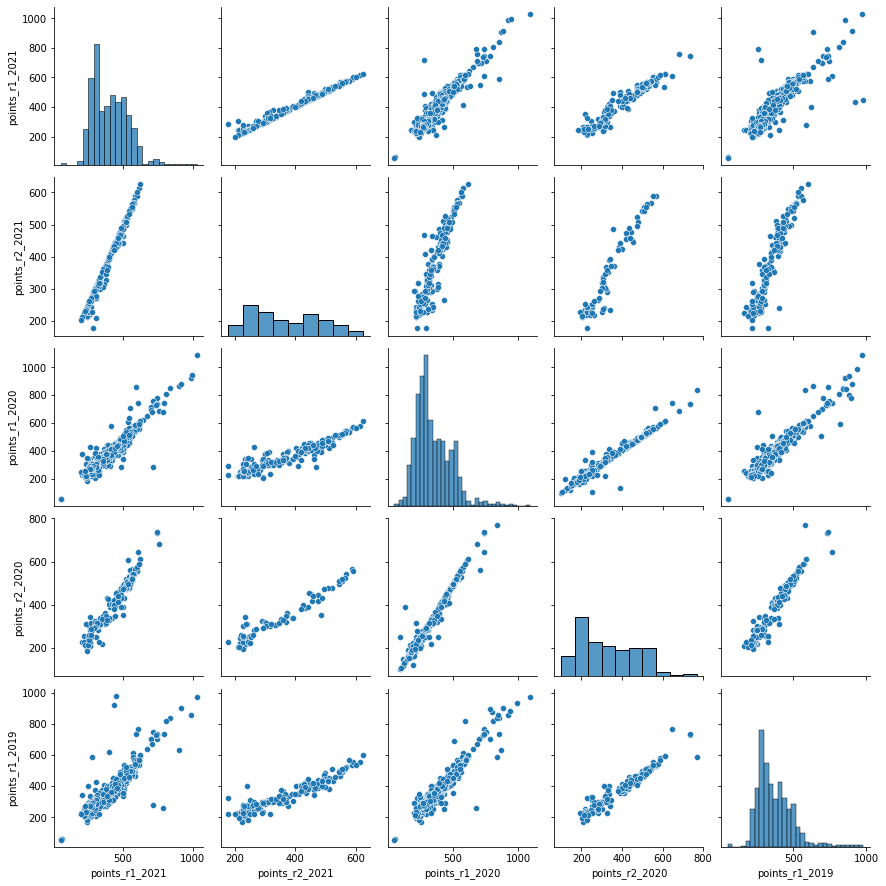

In [53]:
sns.pairplot(allcourses)

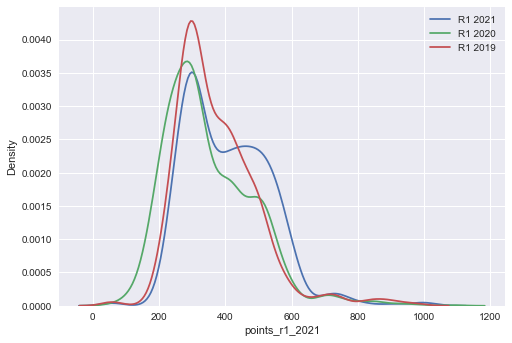

In [54]:
# Plot univariate or bivariate distributions using seaborn kernel density estimation [11]
# Change style to seaborn
plt.style.use('seaborn')
sns.kdeplot(allcourses['points_r1_2021'], label='R1 2021')
sns.kdeplot(allcourses['points_r1_2020'], label='R1 2020')
sns.kdeplot(allcourses['points_r1_2019'], label='R1 2019')
plt.legend()
plt.show()

***

## References
1. https://www.w3schools.com/python/python_regex.asp
2. https://www.w3schools.com/python/module_requests.asp
3. https://www.w3schools.com/python/python_datetime.asp
4. https://www.w3schools.com/python/pandas/pandas_intro.asp
5. https://www.geeksforgeeks.org/python-urllib-module/
6. http://www.cao.ie/index.php?page=points&p=2021
7 https://www.cao.ie/index.php?page=points&p=2020
8. https://www.geeksforgeeks.org/pandas-remove-special-characters-from-column-names/
9. https://www.cao.ie/index.php?page=points&p=2019
10. https://stackoverflow.com/questions/42135409/removing-a-character-from-entire-data-frame
10. https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
11. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
